In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [92]:
df= pd.read_csv('nba_spotrac_data.csv')
df.sort_values(by='year',ascending=False).head(10)

,player,pos,age,contract_type,cap_hit,cap_hit_pct_league_cap,team,year
6746,Zyon Pullin,PG,23.0,TW,-,-,miami heat,2024
2687,Cody Martin,SF,29.0,FA,"$8,120,000",5.78%,charlotte hornets,2024
2467,Garrison Mathews,SG,28.0,ROS,"$2,230,253",1.59%,atlanta hawks,2024
2468,Vit Krejci,PG,24.0,FA,"$2,162,606",1.54%,atlanta hawks,2024
2469,E.J. Liddell,PF,24.0,FA,"$2,120,693",1.51%,atlanta hawks,2024
2470,Mouhamed Gueye,PF,22.0,RK,"$1,891,857",1.35%,atlanta hawks,2024
2471,Keaton Wallace,G,25.0,TW,-,-,atlanta hawks,2024
2472,Seth Lundy,SG,24.0,TW,-,-,atlanta hawks,2024
2682,LaMelo Ball,PG,23.0,DRK-EXT,"$35,147,000",25.00%,charlotte hornets,2024
2683,Miles Bridges,SF,26.0,FA,"$23,148,148",16.47%,charlotte hornets,2024


In [93]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
player,6747,1586,Eric Gordon,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pos,6747,7,SG,1534,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,6714.0,NaN,NaN,NaN,26.035448,4.271467,19.0,23.0,25.0,29.0,43.0
contract_type,4683,17,RK,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cap_hit,6747,3620,-,529,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cap_hit_pct_league_cap,6747,1783,-,529,NaN,NaN,NaN,NaN,NaN,NaN,NaN
team,6747,30,houston rockets,236,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,6747.0,NaN,NaN,NaN,2017.70624,4.010765,2011.0,2014.0,2018.0,2021.0,2024.0


In [94]:
df.isnull().sum()

player                       0
pos                          0
age                         33
contract_type             2064
cap_hit                      0
cap_hit_pct_league_cap       0
team                         0
year                         0
dtype: int64

In [95]:
df.shape

(6747, 8)

In [96]:
df.fillna(df['contract_type'].mode()[0],inplace=True)
df.fillna(df['cap_hit'].mode()[0],inplace=True)


/var/folders/rj/ls10h0c155zdk9kpwwzrwfc80000gn/T/ipykernel_19980/1656911925.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'RK' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna(df['contract_type'].mode()[0],inplace=True)


In [98]:
#df['cap_hit'] = df['cap_hit'].str.replace('-','0',regex=False).astype(float)
df['cap_hit'] = df['cap_hit'].replace('-', np.nan).astype('Int64')

ValueError: invalid literal for int() with base 10: '$21,247,044'

In [89]:

df['cap_hit'] = df['cap_hit'].str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(int)

ValueError: cannot convert float NaN to integer

In [66]:
df.sort_values(by='cap_hit',ascending=False,).head(10)

,player,pos,age,contract_type,cap_hit,cap_hit_pct_league_cap,team,year
4473,Stephen Curry,PG,36.0,Maximum-extension,55761216.0,39.66%,golden state warriors,2024
4456,Stephen Curry,PG,35.0,Maximum-extension,51915615.0,38.17%,golden state warriors,2023
878,Joel Embiid,C,30.0,DVET-EXT,51415938.0,36.57%,philadelphia 76ers,2024
3347,Nikola Jokic,C,29.0,DVET-EXT,51415938.0,36.57%,denver nuggets,2024
5146,Kevin Durant,SF,36.0,Maximum-extension,51179021.0,36.40%,phoenix suns,2024
5147,Bradley Beal,SG,31.0,Maximum,50203930.0,35.71%,phoenix suns,2024
5148,Devin Booker,SG,28.0,DVET-EXT,49205800.0,35.00%,phoenix suns,2024
4695,Kawhi Leonard,SF,33.0,Maximum-extension,49205800.0,35.00%,la clippers,2024
3570,Karl-Anthony Towns,C,29.0,DVET-EXT,49205800.0,35.00%,minnesota timberwolves,2024
212,Jaylen Brown,SF,28.0,DVET-EXT,49205800.0,35.00%,boston celtics,2024


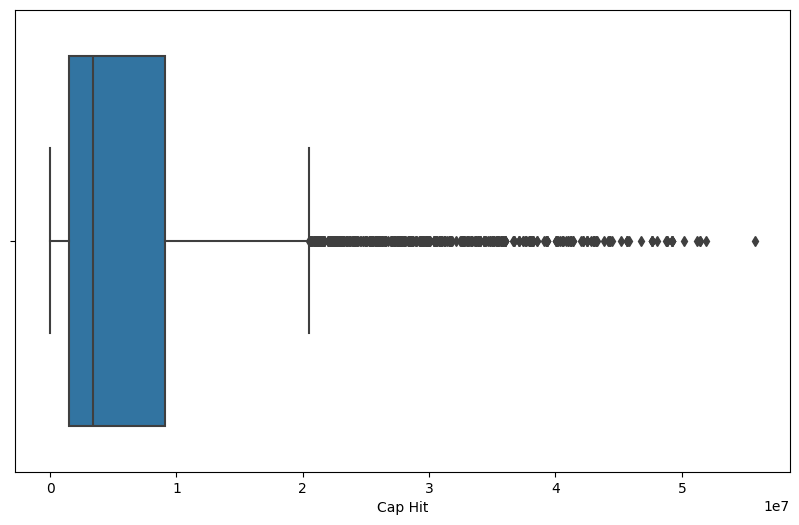

In [69]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='cap_hit')
plt.xlabel('Cap Hit')
plt.show()

In [71]:
# Z-Score Normalization
df['cap_hit_standardized'] = (df['cap_hit'] - df['cap_hit'].mean()) / df['cap_hit'].std()

In [72]:
df.sort_values(by='cap_hit',ascending=False,).head(10)

,player,pos,age,contract_type,cap_hit,cap_hit_pct_league_cap,team,year,cap_hit_standardized
4473,Stephen Curry,PG,36.0,Maximum-extension,55761216.0,39.66%,golden state warriors,2024,5.689362
4456,Stephen Curry,PG,35.0,Maximum-extension,51915615.0,38.17%,golden state warriors,2023,5.241342
878,Joel Embiid,C,30.0,DVET-EXT,51415938.0,36.57%,philadelphia 76ers,2024,5.183128
3347,Nikola Jokic,C,29.0,DVET-EXT,51415938.0,36.57%,denver nuggets,2024,5.183128
5146,Kevin Durant,SF,36.0,Maximum-extension,51179021.0,36.40%,phoenix suns,2024,5.155527
5147,Bradley Beal,SG,31.0,Maximum,50203930.0,35.71%,phoenix suns,2024,5.041927
5148,Devin Booker,SG,28.0,DVET-EXT,49205800.0,35.00%,phoenix suns,2024,4.925642
4695,Kawhi Leonard,SF,33.0,Maximum-extension,49205800.0,35.00%,la clippers,2024,4.925642
3570,Karl-Anthony Towns,C,29.0,DVET-EXT,49205800.0,35.00%,minnesota timberwolves,2024,4.925642
212,Jaylen Brown,SF,28.0,DVET-EXT,49205800.0,35.00%,boston celtics,2024,4.925642
